In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Rezolvarea regresiei liniare folosind triangularizarea ortogonala.

Acest notebook ne va ghida in aplicarea algoritmului TORT in scopul calcularii regresiei liniare. Pentru a verifica precizia algoritmului, vom calcula atat eroarea medie cat si eroarea patratica, pe un exemplu cu actiuni.  
  
Primul pas este preluarea informatiei. Astfel, in vectorul y stocam preturile de inchidere ale indicelui S&P500 pe data de 1, pe o perioada de 36 luni, incepand cu 1.01.2019. Vectorul x retine data pretului de inchidere.

In [8]:
y = np.array([2607.39, 2754.86, 2803.98, 2903.80, 2854.71, 2890.17, 2996.11, 2897.50, 2982.16, 2977.68, 3104.90, 3176.75, 3278.20, 3277.31, 2652.39, 2761.98, 2919.61, 3104.66, 3207.62, 3391.71, 3365.52, 3418.70, 3548.99, 3695.31, 3793.75, 3883.43, 3910.51, 4141.18, 4167.85, 4238.49, 4363.71, 4454.21, 4493.28, 4460.71, 4667.39, 4610.81]).T
x = np.array(['01-01-2019', '01-02-2019', '01-03-2019', '01-04-2019', '01-05-2019', '01-06-2019', '01-07-2019', '01-08-2019', '01-09-2019', '01-10-2019', '01-11-2019', '01-12-2019', '01-01-2020', '01-02-2020', '01-03-2020', '01-04-2020', '01-05-2020', '01-06-2020', '01-07-2020', '01-08-2020', '01-09-2020', '01-10-2020', '01-11-2020', '01-12-2020', '01-01-2021', '01-02-2021', '01-03-2021', '01-04-2021', '01-05-2021', '01-06-2021', '01-07-2021', '01-08-2021', '01-09-2021', '01-10-2021', '01-11-2021', '01-12-2021']).T
yCopy = np.copy(y)

Urmatorul pas este crearea matricei coeficientilor. Regresia liniara respecta ecuatia $ y = b_0 + b_1 * x $. Astfel, o metoda de rezolvare poate fi considerarea ecuatiilor generate de multiplele puncte ale graficului ca fiind un sistem de ecuatii liniare supradimensionat (x.size ecuatii si 2 necunoscute - $ b_0, b_1 $).

In [9]:
onesArr = np.ones((x.shape[0], 1))
A = np.column_stack((onesArr, range(x.size)))
print(A)
sol = np.linalg.pinv(np.copy(A))@np.copy(y)

[[ 1.  0.]
 [ 1.  1.]
 [ 1.  2.]
 [ 1.  3.]
 [ 1.  4.]
 [ 1.  5.]
 [ 1.  6.]
 [ 1.  7.]
 [ 1.  8.]
 [ 1.  9.]
 [ 1. 10.]
 [ 1. 11.]
 [ 1. 12.]
 [ 1. 13.]
 [ 1. 14.]
 [ 1. 15.]
 [ 1. 16.]
 [ 1. 17.]
 [ 1. 18.]
 [ 1. 19.]
 [ 1. 20.]
 [ 1. 21.]
 [ 1. 22.]
 [ 1. 23.]
 [ 1. 24.]
 [ 1. 25.]
 [ 1. 26.]
 [ 1. 27.]
 [ 1. 28.]
 [ 1. 29.]
 [ 1. 30.]
 [ 1. 31.]
 [ 1. 32.]
 [ 1. 33.]
 [ 1. 34.]
 [ 1. 35.]]


Pentru rezolvarea sistemului $ A * coef = y $, ne vom folosi de algoritmul TORT pentru a reduce matricea la o forma superior triunghiulara, apoi vom aplica UTRIS.

In [10]:
# Preluam dimensiunile matricei de coeficienti
m, n = A.shape

def TORT (A):
    U = np.zeros((m, n))
    p = min(m-1, n)
    beta = np.zeros((p, 1))
    for k in range(p):
        # Calcularea lui sigma
        s = 0
        for i in range(k, m):
            s = s + A[i, k]**2
        sigma = np.sign(A[k, k]) * np.sqrt(s)
        
        if sigma != 0:
            # Calcularea vectorilor householder
            U[k, k] = A[k, k] + sigma
            for i in range(k+1, m):
                U[i, k] = A[i, k]            
            beta[k] = sigma * U[k, k]

            # Aplicam reflectorul Householder pe A
            for j in range(k,n):
                tau = 0
                for q in range(k, m):
                    tau = tau + U[q, k] * A[q, j]
                tau = tau / beta[k]
                for i in range(k, m):
                    A[i, j] = A[i, j] - tau * U[i, k]
                    
    return U, A, beta

def Utris(U, b):
    n = len(U)
    x = np.zeros((n, 1))
    for i in range(n-1, -1, -1):
        s = b[i]
        for j in range(i+1, n):
            s = s - U[i][j]*x[j]
        x[i] = s / U[i][i]
    return x

# Aplicam TORT
U, R, beta = TORT(A)

# Aplicam reflectorii Householder asupra lui y
for k in range(n):
    tau = 0
    for i in range(k, m):
        tau = tau + U[i,k] * y[i]
    tau = tau / beta[k]
    for i in range(k, m):
        y[i] = y[i] - tau * U[i,k]
        
c = Utris(R[0:n,:], y[0:n])
print("----- Coeficientii calculati de noi -----")
print(c.T)
print("----- Verificare cu sol -----")
print(sol)

# Ne cream un vector pentru a plota dreapta calculata din regresie
newY = np.array([])
# Anticipam pe un anumit interval, aplicand formula
for val in range(x.size):
    newY = np.append(newY, val * c[1] + c[0])

----- Coeficientii calculati de noi -----
[[2473.41668168   56.68941184]]
----- Verificare cu sol -----
[2473.41668168   56.68941184]


Mai departe, vom calcula eroarea prin 2 metode:
- Eroarea medie, definita de relatia $ r_mean = \sum_{1}^{n} \frac{(y_{final} - y_{initial})^2}{n} $
- Eroarea patratica, definita de relatia $ r^2 = 1 - \frac{\sum_{1}^{n} (y_{final} - y_{initial})^2}{\sum_{1}^{n} (\overline{y_{initial}} - y_{initial})^2} $ 

In [11]:
# Calcularea erorii medii
def getError(initVec, finalVec):
    return np.sqrt(sum((finalVec - initVec) ** 2)) / (initVec.size - 2)

# Calcularea erorii patratice
def getRSquaredError(initVec, finalVec):
    meanY = np.zeros(initVec.size) # Vector de comparatie: are media lui initVec pe fiecare pozitie
    for i in range(initVec.size):
        meanY[i] = np.mean(initVec)
    
    err = sum((finalVec[0:initVec.size] - initVec) ** 2) # Eroarea simpla
    meanErr = sum((meanY - initVec) ** 2) # Eroarea medie

    return 1 - (err / meanErr)

print("Eroarea medie: " + str(getError(yCopy, newY)))
print("Eroarea patratica: " + str(getRSquaredError(yCopy, newY)))

Eroarea medie: 40.06039829640514
Eroarea patratica: 0.8706316898460951


In final, afisam graficul rezultat.

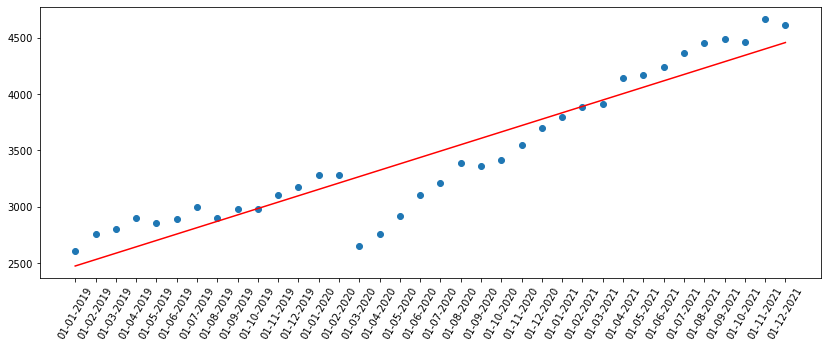

In [12]:
plt.rcParams['figure.figsize'] = [14, 5]
plt.scatter(x, yCopy)
plt.plot(x, newY, color="red")
plt.xticks(rotation=60)
plt.show()